In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="E0YSg2uoG2TH1VebEWB5")
project = rf.workspace("fayrouz-tfojw").project("arabic-license-plates-7jt56")
version = project.version(2)
dataset = version.download("yolov8")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 80.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Arabic-license-plates---2 in yolov8:: 100%|██████████| 367/367 [00:00<00:00, 1680.66it/s]


In [4]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 887.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [7]:
import os

os.rename("/content/Arabic-license-plates---2/test", "/content/Arabic-license-plates---2/val")

In [ ]:
import yaml

with open("dataset/data.yaml", 'r') as file:
    data_yaml = yaml.safe_load(file)

print(data_yaml)

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 1, 'names': ['license_plate'], 'roboflow': {'workspace': 'fayrouz-tfojw', 'project': 'arabic-license-plates-7jt56', 'version': 1, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/fayrouz-tfojw/arabic-license-plates-7jt56/dataset/1'}}


In [ ]:
import yaml

with open("dataset/data.yaml", 'r') as file:
    data_yaml = yaml.safe_load(file)

data_yaml['val'] = '../val/images'

with open("dataset/data.yaml", 'w') as file:
    yaml.dump(data_yaml, file)

print("Updated data.yaml:")
print(data_yaml)

Updated data.yaml:
{'train': '../train/images', 'val': '../val/images', 'test': '../test/images', 'nc': 1, 'names': ['license_plate'], 'roboflow': {'workspace': 'fayrouz-tfojw', 'project': 'arabic-license-plates-7jt56', 'version': 1, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/fayrouz-tfojw/arabic-license-plates-7jt56/dataset/1'}}


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="dataset/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    name="lp_arabic_model"
)


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=lp_arabic_model3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained

100%|██████████| 755k/755k [00:00<00:00, 19.6MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 84.6MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 784.1±419.3 MB/s, size: 45.4 KB)


train: Scanning /content/dataset/train/labels... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<00:00, 2363.45it/s]

train: New cache created: /content/dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 66, len(boxes) = 156. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 817.8±636.2 MB/s, size: 54.0 KB)


val: Scanning /content/dataset/val/labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 1725.55it/s]

val: New cache created: /content/dataset/val/labels.cache


Plotting labels to runs/detect/lp_arabic_model3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/lp_arabic_model3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.01G      1.135      3.621      1.218         24        640: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all         10         11    0.00367          1      0.364      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.03G      1.037      2.275      1.035         20        640: 100%|██████████| 8/8 [00:02<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         10         11    0.00594          1      0.694      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.05G      1.051      1.625      1.059         21        640: 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

                   all         10         11    0.00367          1      0.891      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.07G      1.081      1.525      1.057         31        640: 100%|██████████| 8/8 [00:01<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]

                   all         10         11    0.00367          1      0.906      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.09G      1.043      1.399      1.035         17        640: 100%|██████████| 8/8 [00:01<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]

                   all         10         11          1      0.559      0.825      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.11G      1.058      1.377      1.056         15        640: 100%|██████████| 8/8 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]

                   all         10         11          1      0.761      0.995      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.12G      1.071      1.459      1.043         18        640: 100%|██████████| 8/8 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         10         11          1      0.339      0.908      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.14G      1.064      1.324      1.029         37        640: 100%|██████████| 8/8 [00:02<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         10         11          1      0.342      0.988      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.16G      1.028      1.359      1.034         15        640: 100%|██████████| 8/8 [00:01<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


                   all         10         11      0.205     0.0909      0.332      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.18G     0.9726      1.176       1.05         27        640: 100%|██████████| 8/8 [00:01<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]

                   all         10         11      0.683      0.636      0.744      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.19G      0.971      1.247      1.063         13        640: 100%|██████████| 8/8 [00:01<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all         10         11      0.379      0.545      0.349      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.21G     0.9913      1.191      1.063         22        640: 100%|██████████| 8/8 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]


                   all         10         11      0.979      0.818      0.942      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.23G      1.005      1.137      1.059         22        640: 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         10         11      0.992      0.909      0.971      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.24G     0.9637      1.039      1.041         23        640: 100%|██████████| 8/8 [00:02<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all         10         11      0.904          1      0.988      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.26G     0.9128      1.012      1.022         22        640: 100%|██████████| 8/8 [00:01<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         10         11      0.727          1      0.802      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.28G       1.01      1.063      1.048         13        640: 100%|██████████| 8/8 [00:01<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


                   all         10         11          1      0.982      0.995      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.29G     0.9765      1.053       1.05         19        640: 100%|██████████| 8/8 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]

                   all         10         11          1       0.98      0.995      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.31G     0.9561     0.9543      1.024         26        640: 100%|██████████| 8/8 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.99it/s]

                   all         10         11      0.902          1       0.95      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.33G     0.9428     0.9456      1.023         30        640: 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         10         11      0.846      0.997      0.965      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.34G     0.9496     0.9837      1.046         22        640: 100%|██████████| 8/8 [00:01<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]


                   all         10         11      0.915          1      0.988      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.36G     0.9736     0.9379      1.031         17        640: 100%|██████████| 8/8 [00:01<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all         10         11      0.999          1      0.995      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.38G     0.8869     0.8763      1.028         23        640: 100%|██████████| 8/8 [00:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


                   all         10         11      0.993          1      0.995      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.4G     0.8461     0.8339     0.9997         19        640: 100%|██████████| 8/8 [00:01<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         10         11      0.989          1      0.995       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.41G     0.7964     0.7336     0.9643         23        640: 100%|██████████| 8/8 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all         10         11          1      0.894      0.988      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.43G     0.8785     0.8331      1.026         22        640: 100%|██████████| 8/8 [00:02<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         10         11      0.979      0.909      0.988      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.45G     0.8696     0.8357      1.009         21        640: 100%|██████████| 8/8 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]

                   all         10         11      0.989          1      0.995      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.46G     0.8705     0.8212      1.006         16        640: 100%|██████████| 8/8 [00:01<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]

                   all         10         11          1      0.994      0.995      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.48G     0.8271     0.7558      1.034         23        640: 100%|██████████| 8/8 [00:01<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]

                   all         10         11          1      0.999      0.995      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       2.5G     0.8191     0.7416      0.967         16        640: 100%|██████████| 8/8 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         10         11      0.996          1      0.995      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.52G     0.8159     0.7175      0.969         13        640: 100%|██████████| 8/8 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.15it/s]

                   all         10         11          1      0.994      0.995      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.53G      0.837     0.7853      1.005         53        640: 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         10         11          1      0.998      0.995      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.55G     0.7999     0.7538      1.014         19        640: 100%|██████████| 8/8 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]


                   all         10         11      0.995          1      0.995      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.57G     0.7579     0.6877     0.9721         24        640: 100%|██████████| 8/8 [00:01<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


                   all         10         11      0.997          1      0.995       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.58G     0.7327     0.6676     0.9667         26        640: 100%|██████████| 8/8 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.12it/s]

                   all         10         11          1      0.998      0.995      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.6G     0.7682      0.665     0.9805         12        640: 100%|██████████| 8/8 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all         10         11      0.998          1      0.995      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.62G     0.7131     0.6248     0.9021         19        640: 100%|██████████| 8/8 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all         10         11      0.993          1      0.995      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.64G     0.7245     0.6201     0.9476         21        640: 100%|██████████| 8/8 [00:02<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         10         11      0.992          1      0.995      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.65G     0.6976     0.6213     0.9385         16        640: 100%|██████████| 8/8 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.89it/s]

                   all         10         11      0.995          1      0.995       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.67G     0.7279     0.6156      0.966         20        640: 100%|██████████| 8/8 [00:01<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all         10         11      0.997          1      0.995      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.69G     0.6551     0.5915      0.938         27        640: 100%|██████████| 8/8 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all         10         11          1      0.998      0.995      0.496


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.71G     0.6035     0.6175     0.9294         18        640: 100%|██████████| 8/8 [00:03<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         10         11          1      0.998      0.995       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.72G     0.5947     0.5952     0.8849         13        640: 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all         10         11          1      0.996      0.995      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.74G     0.5654     0.5717     0.8779         20        640: 100%|██████████| 8/8 [00:01<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]

                   all         10         11          1      0.996      0.995      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.76G     0.5832      0.593     0.9029         11        640: 100%|██████████| 8/8 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.95it/s]

                   all         10         11          1      0.996      0.995       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.77G     0.6081     0.5769     0.9093         17        640: 100%|██████████| 8/8 [00:01<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]

                   all         10         11          1      0.996      0.995      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.79G     0.5491     0.5529     0.8651         12        640: 100%|██████████| 8/8 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.04it/s]

                   all         10         11          1      0.996      0.995       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.81G     0.5671     0.5713     0.8852         11        640: 100%|██████████| 8/8 [00:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]

                   all         10         11          1      0.996      0.995      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.82G     0.5441     0.5413     0.8674         11        640: 100%|██████████| 8/8 [00:02<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         10         11          1      0.995      0.995      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.84G     0.5377      0.538     0.8637         11        640: 100%|██████████| 8/8 [00:01<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         10         11          1      0.996      0.995      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.86G     0.5611     0.5795      0.881         13        640: 100%|██████████| 8/8 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]

                   all         10         11          1      0.996      0.995      0.557



50 epochs completed in 0.033 hours.
Optimizer stripped from runs/detect/lp_arabic_model3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/lp_arabic_model3/weights/best.pt, 6.2MB

Validating runs/detect/lp_arabic_model3/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.04it/s]


                   all         10         11          1      0.979      0.995      0.618
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/lp_arabic_model3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c4349f1e490>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [11]:
from google.colab import files

files.download("/content/runs/detect/lp_all_rf2/weights/best.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


image 1/1 /content/images (14).jpeg: 544x640 1 license_plate, 234.5ms
Speed: 4.5ms preprocess, 234.5ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)


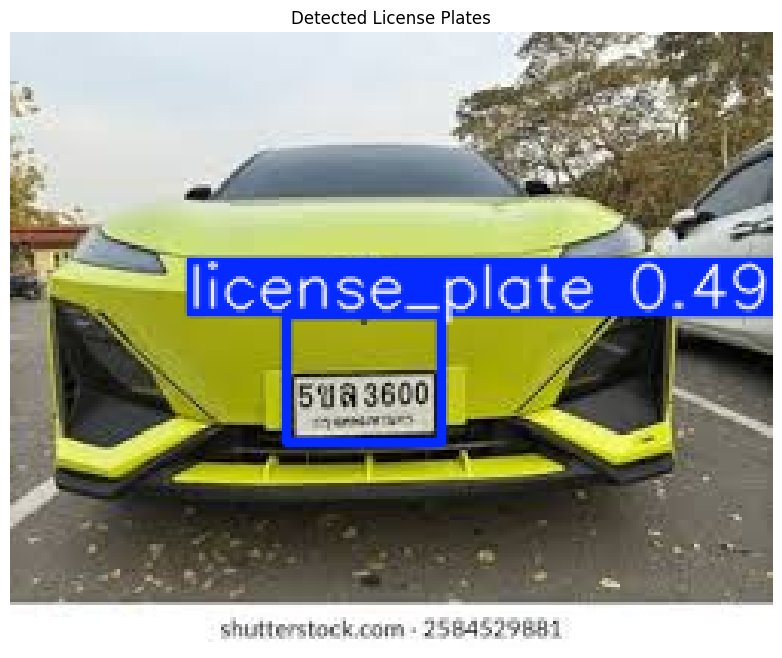


 Detected Plates:
Bounding Box: [90, 92, 141, 134] | Confidence: 0.49


In [86]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os


model = YOLO("/content/best (1).pt")


image_path = "/content/images (14).jpeg"


results = model(image_path, conf=0.4)


img_with_boxes = results[0].plot()

plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Detected License Plates")
plt.show()


print("\n Detected Plates:")
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    conf = float(box.conf[0])
    print(f"Bounding Box: [{x1}, {y1}, {x2}, {y2}] | Confidence: {conf:.2f}")


In [87]:
cv2.imwrite("output_detected.jpg", img_with_boxes)


True

In [88]:
import cv2
import os


image = cv2.imread("/content/images (14).jpeg")


os.makedirs("cropped_plates", exist_ok=True)


results = model("/content/images (14).jpeg", conf=0.3)
boxes = results[0].boxes


for i, box in enumerate(boxes):
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cropped = image[y1:y2, x1:x2]
    crop_path = f"cropped_plates/plate_{2}.jpg"
    cv2.imwrite(crop_path, cropped)
    print(f" Saved: {crop_path}")


image 1/1 /content/images (14).jpeg: 544x640 1 license_plate, 302.3ms
Speed: 7.7ms preprocess, 302.3ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)
 Saved: cropped_plates/plate_2.jpg


In [20]:
%%capture
!pip install paddlepaddle==3.0.0 -i https://www.paddlepaddle.org.cn/packages/stable/cpu/
!pip install paddleocr

In [78]:
from paddleocr import PaddleOCR

ocr = PaddleOCR(use_angle_cls=False, lang='en')
results = ocr.ocr("/content/cropped_plates/plate_1.jpg")

print(results)


The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('UVDoc', None)
The model(UVDoc) is not supported to run in MKLDNN mode! Using `paddle` instead!
Using official model (UVDoc), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_rec', None)
Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Please use `predict` instead.


[{'input_path': '/content/cropped_plates/plate_1.jpg', 'page_index': None, 'doc_preprocessor_res': {'input_path': None, 'page_index': None, 'input_img': array([[[172, ...,  36],
        ...,
        [137, ...,  30]],

       ...,

       [[245, ..., 115],
        ...,
        [215, ..., 130]]], dtype=uint8), 'model_settings': {'use_doc_orientation_classify': True, 'use_doc_unwarping': True}, 'angle': 180, 'rot_img': array([[[  0, ...,   0],
        ...,
        [  0, ...,   0]],

       ...,

       [[  0, ...,   0],
        ...,
        [154, ...,  33]]], dtype=uint8), 'output_img': array([[[ 96, ...,  38],
        ...,
        [173, ..., 116]],

       ...,

       [[ 69, ...,  11],
        ...,
        [ 73, ...,  13]]], dtype=uint8)}, 'dt_polys': [array([[ 4,  6],
       ...,
       [ 4, 20]], dtype=int16)], 'model_settings': {'use_doc_preprocessor': True, 'use_textline_orientation': False}, 'text_det_params': {'limit_side_len': 64, 'limit_type': 'min', 'thresh': 0.3, 'max_side_lim

In [94]:
from paddleocr import PaddleOCR

ocr = PaddleOCR(use_angle_cls=False, lang='en')

results = ocr.ocr("/content/cropped_plates/plate_1.jpg")

for item in results:
    if "rec_texts" in item and "rec_scores" in item:
        for text, score in zip(item["rec_texts"], item["rec_scores"]):
            print(f" Detected Text: {text} | Confidence: {score:.2f}")


The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('UVDoc', None)
The model(UVDoc) is not supported to run in MKLDNN mode! Using `paddle` instead!
Using official model (UVDoc), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_rec', None)
Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /root/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Please use `predict` instead.


 Detected Text: C0I10X3 | Confidence: 0.36


In [95]:
import json


ocr_result = {
    "filename": "plate_2.jpg",
    "text": "5083600",
    "confidence": 0.88
}


with open("ocr_results3.json", "w", encoding="utf-8") as f:
    json.dump([ocr_result], f, indent=4, ensure_ascii=False)


In [96]:
import json
import os

new_result = {
    "filename": "plate_1.jpg",
    "text": "C0I10X3",
    "confidence": 0.36
}

if os.path.exists("ocr_results3.json"):
    with open("ocr_results3.json", "r", encoding="utf-8") as f:
        data = json.load(f)
else:
    data = []


data.append(new_result)


with open("ocr_results3.json", "w", encoding="utf-8") as f:
    json.dump(data, f, indent=4, ensure_ascii=False)




In [97]:
import json
import os


new_results = [
    {"filename": "plate_4.jpg", "text": "HAF", "confidence": 1.00},
    {"filename": "plate_4.jpg", "text": "HER", "confidence": 0.99}
]


if os.path.exists("ocr_results3.json"):
    with open("ocr_results3.json", "r", encoding="utf-8") as f:
        data = json.load(f)
else:
    data = []


data.extend(new_results)


with open("ocr_results3.json", "w", encoding="utf-8") as f:
    json.dump(data, f, indent=4, ensure_ascii=False)


